In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_images = pd.read_csv('../data/processed/n_images_for_part.csv')

In [21]:
path = n_images.iloc[0, :].path
img = cv2.imread('../data/' + path)

In [24]:
img.shape

(512, 380, 3)

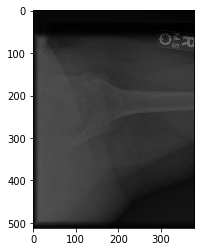

In [30]:
plt.imshow()

In [32]:
img2 = cv2.resize(img, (256, 256))

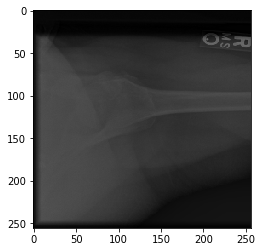

In [34]:
plt.imshow(img2)

In [35]:
img2.shape

(256, 256, 3)

In [116]:
n_len = len(n_images)
images = np.zeros(shape=(n_len, 256, 256), dtype=np.uint8)
for idx, row in n_images.iterrows():
        
    #if idx >= 10:
    #    break
    img_row = cv2.imread('../data/' + row.path)
    img_row = cv2.resize(img_row, (256, 256))
    img_row = cv2.cvtColor(img_row, cv2.COLOR_BGR2GRAY)
    img_row = cv2.adaptiveThreshold(img_row, 255, 
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 
                                    25, 2)
    images[idx] = img_row

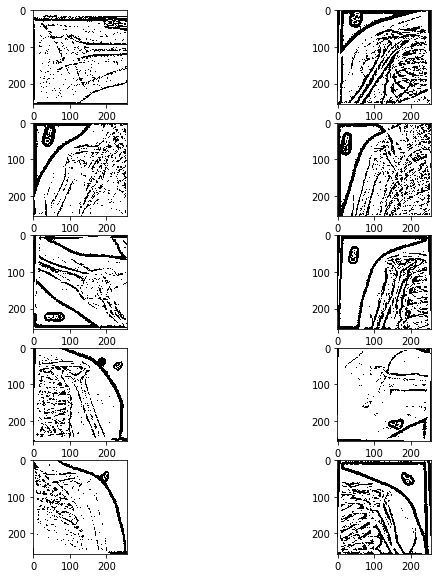

In [117]:
plt.figure(figsize=(10, 10))
for sub in np.arange(10):
    plt.subplot(5, 2, sub + 1)
    plt.imshow(images[sub], cmap='gray')

In [118]:
images.shape

(700, 256, 256)

In [119]:
from sklearn.decomposition import PCA

In [149]:
pca = PCA(n_components=100, random_state=666)

In [150]:
pca_images = images.reshape(-1, 256 * 256)

In [151]:
pca.fit(pca_images)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=666,
  svd_solver='auto', tol=0.0, whiten=False)

In [152]:
reduced_images = pca.transform(pca_images)

In [141]:
import seaborn as sns

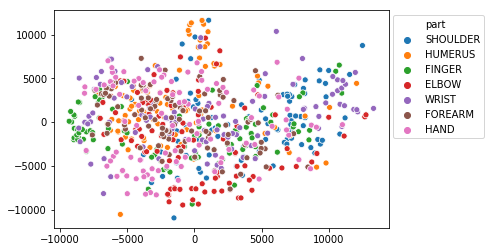

In [153]:
sns.scatterplot(x=reduced_images[:, 0], y=reduced_images[:, 1], hue=n_images.part)
plt.legend(loc=1, bbox_to_anchor=(1.3, 1))

In [154]:
sum(pca.explained_variance_ratio_)

0.40056259855920934